In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_excel("df.xlsx")
df

,Регион + дата,ОКР,"ИЖК, млн руб",Уровень безработицы %,"ЗП ном, руб"
0,ХМАО 01.01.2016,4.599312,28578,4.6,63 567.9
1,ХМАО 01.02.2016,4.573876,1902,4.6,63 567.9
2,ХМАО 01.03.2016,5.154282,5192,4.6,63 567.9
3,ХМАО 01.04.2016,4.738054,7939,4.2,63 567.9
4,ХМАО 01.05.2016,5.154282,11214,4.2,63 567.9
...,...,...,...,...,...
67,ЯНАО 01.08.2018,3.960981,15338,2.0,90869.35
68,ЯНАО 01.09.2018,3.809955,18009,2.0,86012.61
69,ЯНАО 01.10.2018,4.812214,20099,2.3,86532.43
70,ЯНАО 01.11.2018,4.009034,22878,2.3,86560.33


In [ ]:
# Разделяем первый столбец на Регион и Дату
df[['Регион', 'Дата']] = df.iloc[:, 0].str.extract(r'(.+?)\s+(\d{2}\.\d{2}\.\d{4})')

# Преобразуем дату в datetime, день первый
df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y')

# Пример: если в 'ЗП ном, руб' пробелы в числах, заменим пробелы и приведём к числу
df['ЗП ном, руб'] = df['ЗП ном, руб'].astype(str).str.replace(' ', '').astype(float)
df

,Регион + дата,ОКР,"ИЖК, млн руб",Уровень безработицы %,"ЗП ном, руб",Регион,Дата
0,ХМАО 01.01.2016,4.599312,28578,4.6,63567.90,ХМАО,2016-01-01
1,ХМАО 01.02.2016,4.573876,1902,4.6,63567.90,ХМАО,2016-02-01
2,ХМАО 01.03.2016,5.154282,5192,4.6,63567.90,ХМАО,2016-03-01
3,ХМАО 01.04.2016,4.738054,7939,4.2,63567.90,ХМАО,2016-04-01
4,ХМАО 01.05.2016,5.154282,11214,4.2,63567.90,ХМАО,2016-05-01
...,...,...,...,...,...,...,...
67,ЯНАО 01.08.2018,3.960981,15338,2.0,90869.35,ЯНАО,2018-08-01
68,ЯНАО 01.09.2018,3.809955,18009,2.0,86012.61,ЯНАО,2018-09-01
69,ЯНАО 01.10.2018,4.812214,20099,2.3,86532.43,ЯНАО,2018-10-01
70,ЯНАО 01.11.2018,4.009034,22878,2.3,86560.33,ЯНАО,2018-11-01


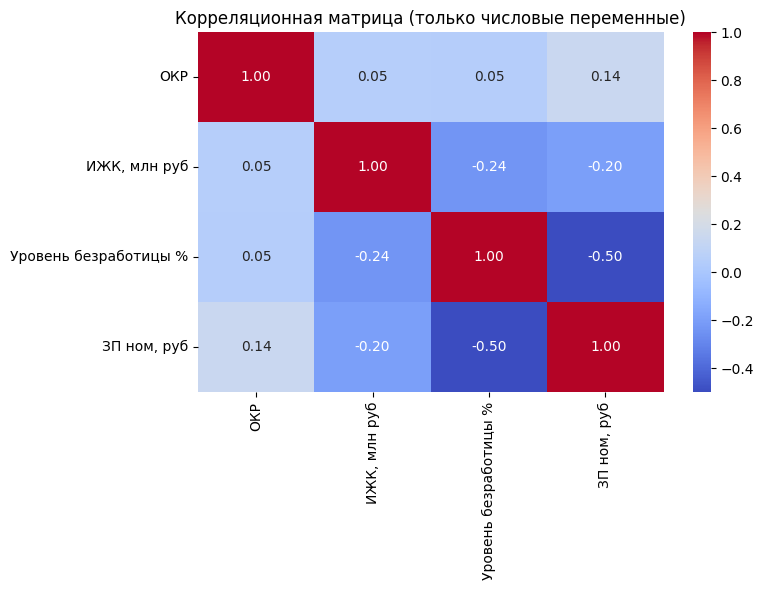

In [ ]:
# Отбираем только числовые столбцы
df_numeric = df.select_dtypes(include='number')

# Строим корреляционную матрицу
corr = df_numeric.corr()

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица (только числовые переменные)")
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

# Подсчет VIF
X = dmatrix("ОКР + Q('ИЖК, млн руб') + Q('Уровень безработицы %') + Q('ЗП ном, руб')", df, return_type='dataframe')
vif_data = pd.DataFrame()
vif_data["Переменная"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Переменная,VIF
0,Intercept,111.624606
1,ОКР,1.066105
2,"Q('ИЖК, млн руб')",1.266881
3,Q('Уровень безработицы %'),1.640841
4,"Q('ЗП ном, руб')",1.646034


In [ ]:
desc = df.groupby('Регион').describe()
desc

ОКР                                                               \
       count      mean       min       25%       50%       75%        max   
Регион                                                                      
ХМАО    36.0  4.605266  3.758471  4.356578  4.583005  4.824554   5.570509   
ЯНАО    36.0  4.644833  3.797312  4.079604  4.351112  4.700222  13.654056   

                 ИЖК, млн руб                ... ЗП ном, руб                \
             std        count          mean  ...         max           std   
Регион                                       ...                             
ХМАО    0.391802         36.0  24876.277778  ...    95941.02   8371.544010   
ЯНАО    1.591578         36.0  15720.138889  ...   117681.65  10422.235229   

        Дата                                                                 \
       count                 mean                  min                  25%   
Регион                                                                        
ХМАО      36  2017-06-16 10:40:00  2016-01-01 00:00:00  2016-09-23 12:00:00   
ЯНАО      36  2017-06-16 10:40:00  2016-01-01 00:00:00  2016-09-23 12:00:00   

                                                                            
                        50%                  75%                  max  std  
Регион                                                                      
ХМАО    2017-06-16 00:00:00  2018-03-08 18:00:00  2018-12-01 00:00:00  NaN  
ЯНАО    2017-06-16 00:00:00  2018-03-08 18:00:00  2018-12-01 00:00:00  NaN  

[2 rows x 40 columns]

**Описательные статистики**

In [ ]:
okr_stats = df.groupby('Регион')['ОКР'].describe()
okr_stats

,count,mean,std,min,25%,50%,75%,max
Регион,,,,,,,,
ХМАО,36.0,4.605266,0.391802,3.758471,4.356578,4.583005,4.824554,5.570509
ЯНАО,36.0,4.644833,1.591578,3.797312,4.079604,4.351112,4.700222,13.654056


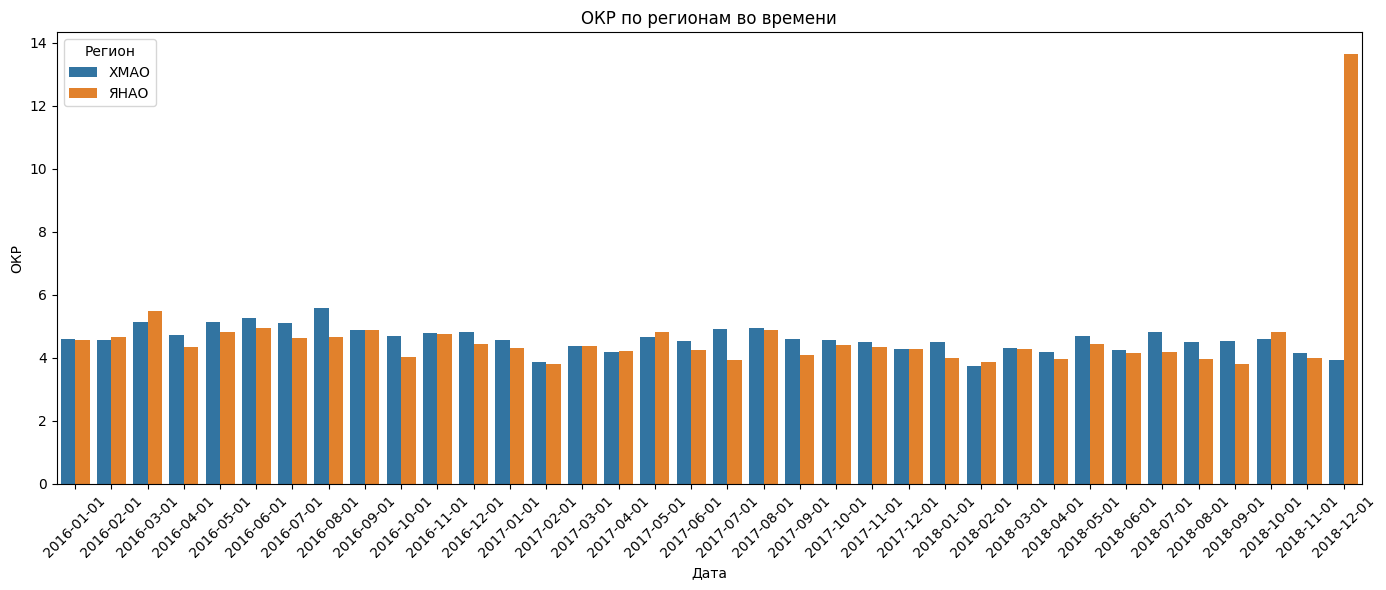

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Дата', y='ОКР', hue='Регион')
plt.title('ОКР по регионам во времени')
plt.ylabel('ОКР')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

In [ ]:
izhk_stats = df.groupby('Регион')['ИЖК, млн руб'].describe()
izhk_stats

,count,mean,std,min,25%,50%,75%,max
Регион,,,,,,,,
ХМАО,36.0,24876.277778,16503.022055,1552.0,10983.25,24416.0,36245.50,63604.0
ЯНАО,36.0,15720.138889,16364.861442,642.0,4412.25,11083.0,19214.75,64373.0


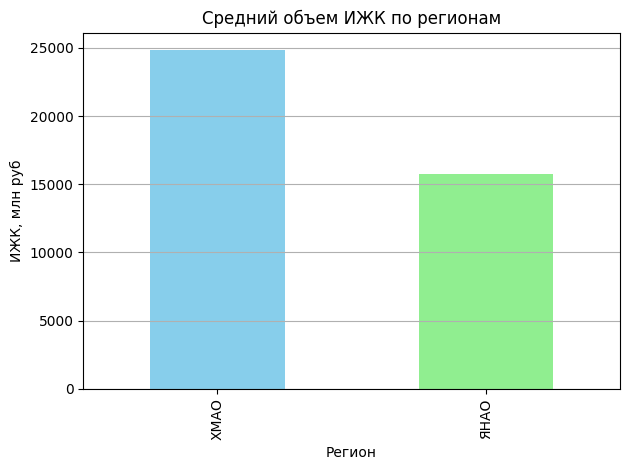

In [ ]:
avg_izhk = df.groupby('Регион')['ИЖК, млн руб'].mean()

avg_izhk.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Средний объем ИЖК по регионам')
plt.ylabel('ИЖК, млн руб')
plt.xlabel('Регион')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

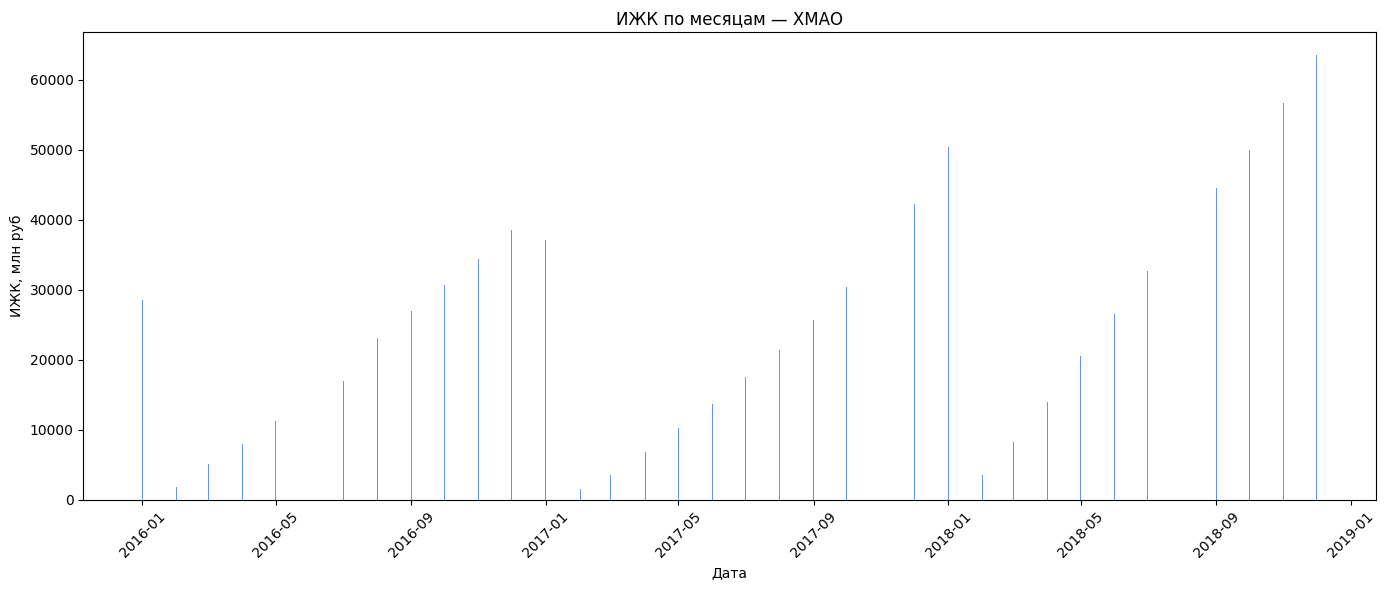

In [ ]:
#по ХМАО
region_df = df[df['Регион'] == 'ХМАО']

plt.figure(figsize=(14, 6))
plt.bar(region_df['Дата'], region_df['ИЖК, млн руб'], color='cornflowerblue')
plt.title('ИЖК по месяцам — ХМАО')
plt.ylabel('ИЖК, млн руб')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

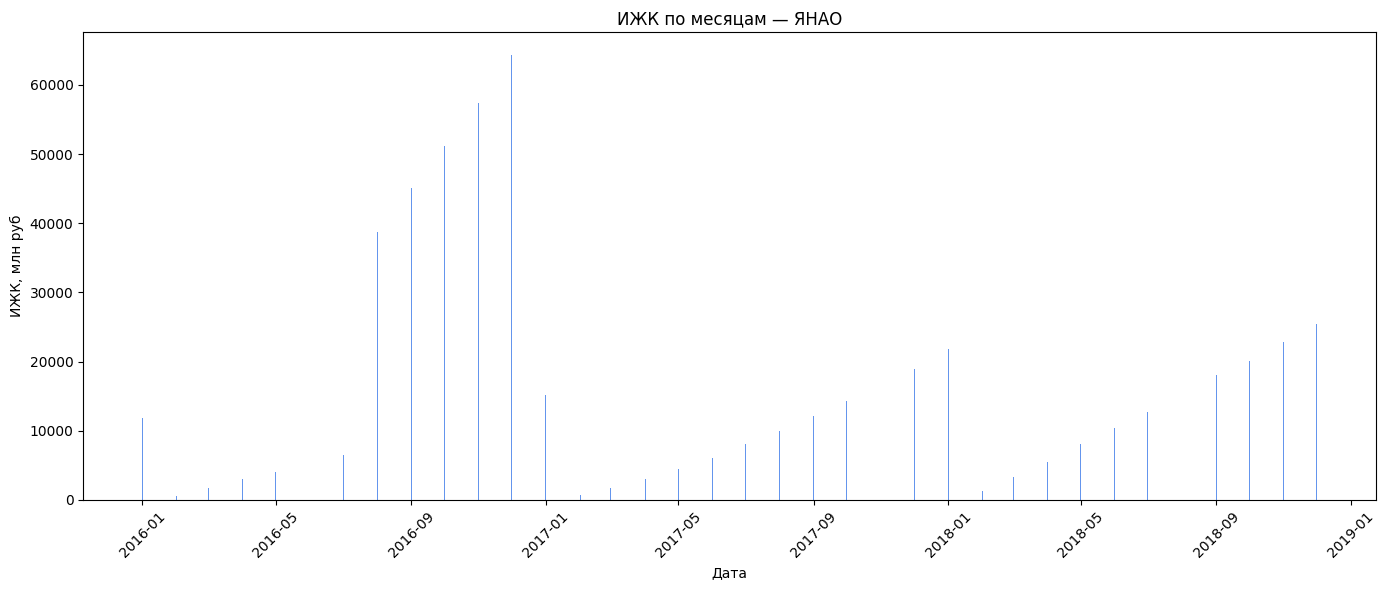

In [ ]:
# по ЯНАО
region_df = df[df['Регион'] == 'ЯНАО']

plt.figure(figsize=(14, 6))
plt.bar(region_df['Дата'], region_df['ИЖК, млн руб'], color='cornflowerblue')
plt.title('ИЖК по месяцам — ЯНАО')
plt.ylabel('ИЖК, млн руб')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

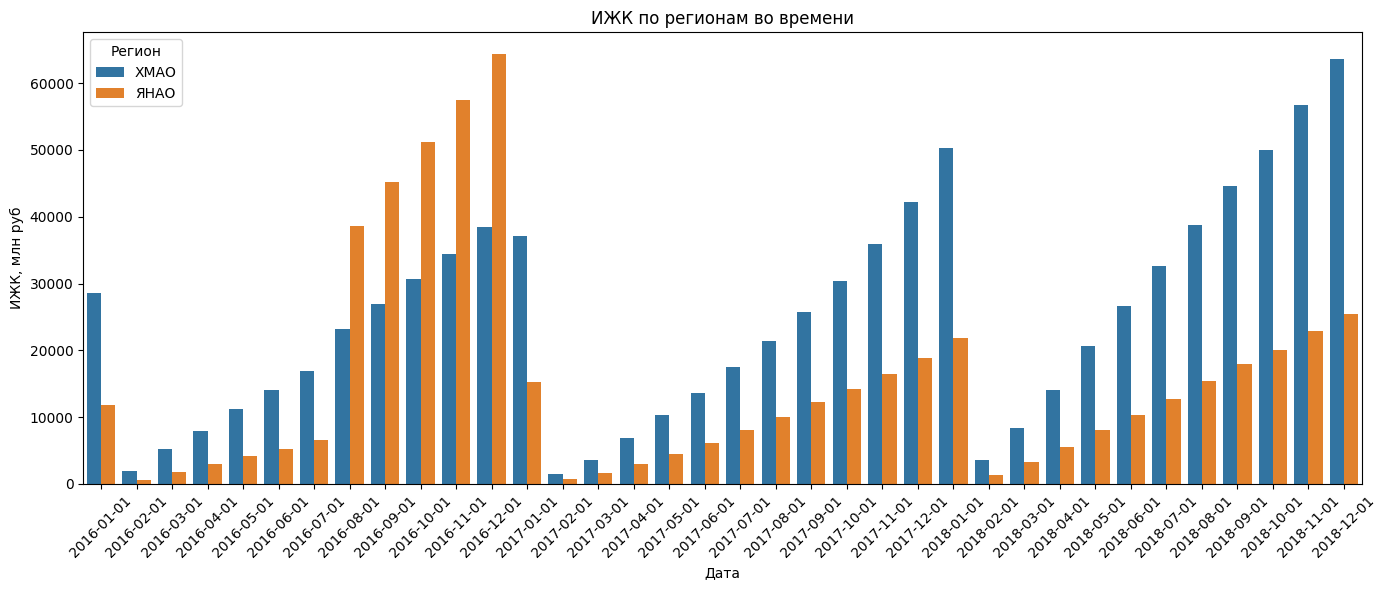

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Дата', y='ИЖК, млн руб', hue='Регион')
plt.title('ИЖК по регионам во времени')
plt.ylabel('ИЖК, млн руб')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

In [ ]:
unemp_stats = df.groupby('Регион')['Уровень безработицы %'].describe()
print("Уровень безработицы %:\n", unemp_stats)

Уровень безработицы %:
         count      mean       std  min  25%   50%   75%  max
Регион                                                      
ХМАО     36.0  3.483333  0.915423  2.3  2.7  3.15  4.25  5.2
ЯНАО     36.0  2.691667  0.708066  1.9  2.0  2.35  3.35  3.9


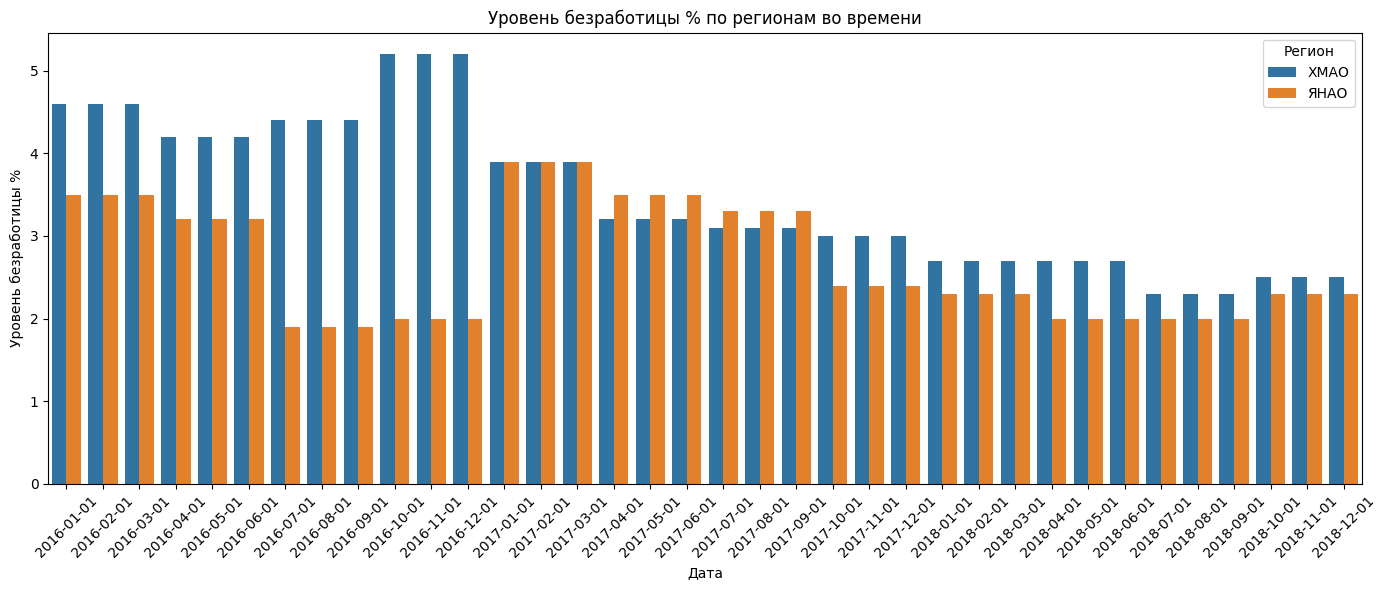

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Дата', y='Уровень безработицы %', hue='Регион')
plt.title('Уровень безработицы % по регионам во времени')
plt.ylabel('Уровень безработицы %')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

In [ ]:
zp_stats = df.groupby('Регион')['ЗП ном, руб'].describe()
print("ЗП ном, руб:\n", zp_stats)

ЗП ном, руб:
         count          mean           std       min      25%        50%  \
Регион                                                                    
ХМАО     36.0  66955.921111   8371.544010  56902.83  63567.9  63567.900   
ЯНАО     36.0  89943.978611  10422.235229  80259.79  83237.7  85108.605   

              75%        max  
Регион                        
ХМАО    67562.935   95941.02  
ЯНАО    91828.630  117681.65  


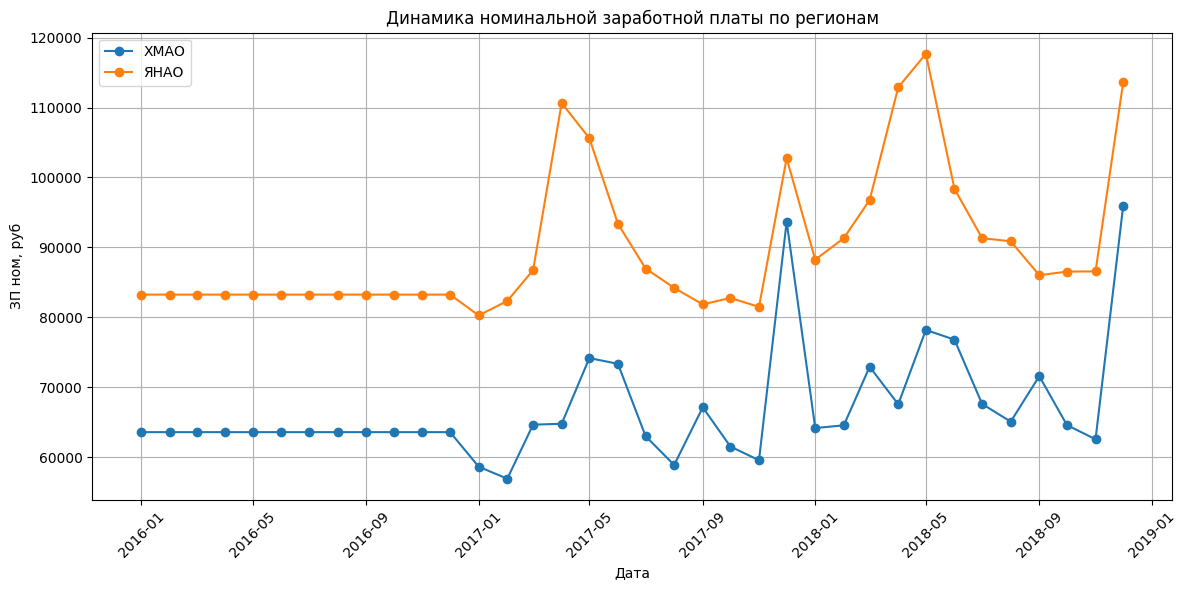

In [ ]:
import matplotlib.pyplot as plt

# Убедимся, что сортировка по дате корректна
df = df.sort_values(by='Дата')

# Создаём график
plt.figure(figsize=(12, 6))

# Уникальные регионы
regions = df['Регион'].unique()

# Строим линию для каждого региона
for region in regions:
    region_data = df[df['Регион'] == region]
    plt.plot(region_data['Дата'], region_data['ЗП ном, руб'], label=region, marker='o')

# Оформление
plt.title('Динамика номинальной заработной платы по регионам')
plt.xlabel('Дата')
plt.ylabel('ЗП ном, руб')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

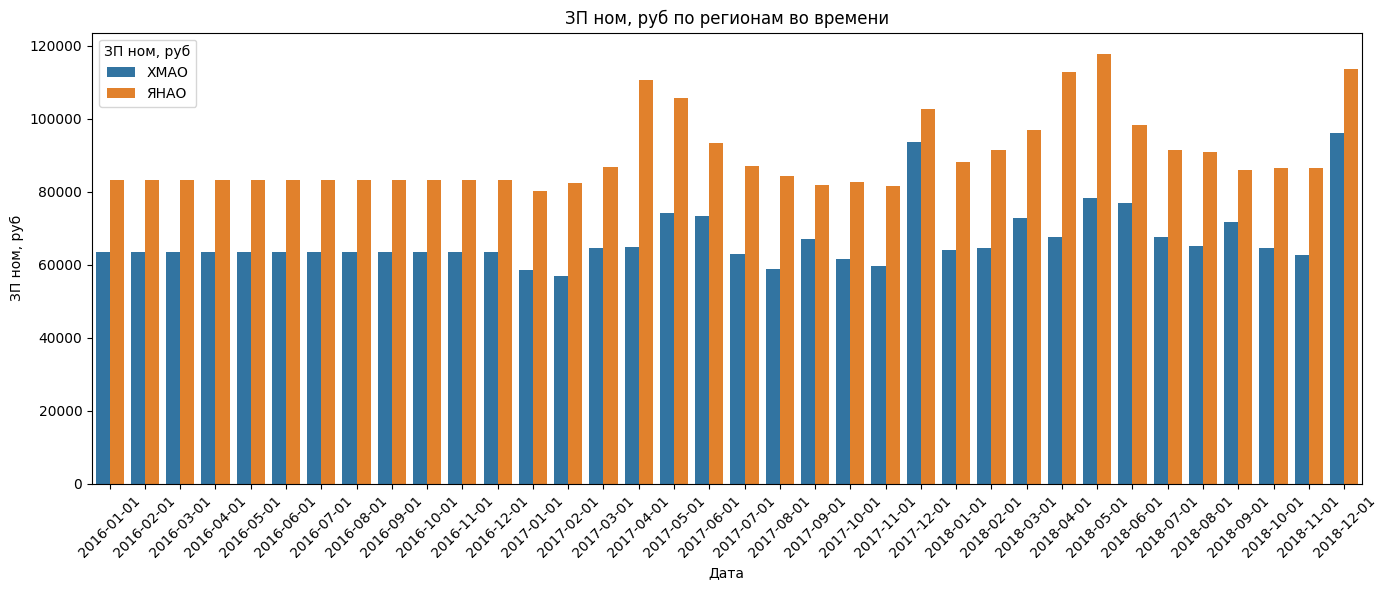

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Дата', y='ЗП ном, руб', hue='Регион')
plt.title('ЗП ном, руб по регионам во времени')
plt.ylabel('ЗП ном, руб')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend(title='ЗП ном, руб')
plt.tight_layout()
plt.show()

**OLS оценка**

Уравнение регрессии для ХМАО:

ОКР = 5.5858 + (0.0000) * ИЖК + (-0.1425) * Уровень_безработицы + (-0.0000) * ЗП

Уравнение регрессии для ЯНАО:

ОКР = 3.7174 + (0.0000) * ИЖК + (0.1293) * Уровень_безработицы + (0.0000) * ЗП

**RDD модель**

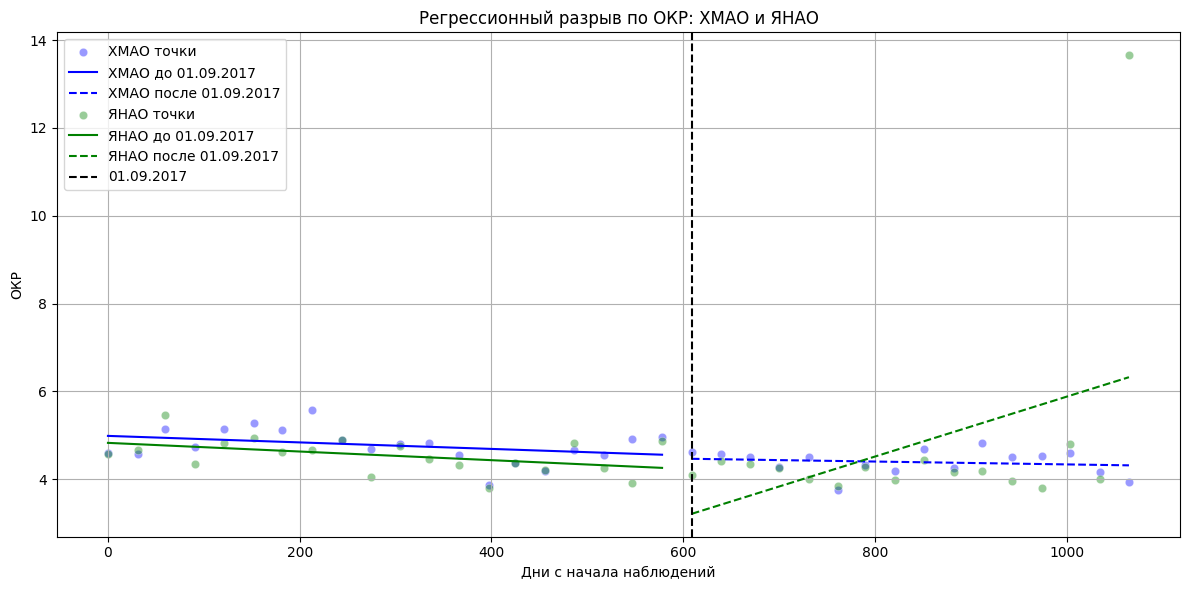

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Преобразование даты
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True)
df['ОКР'] = pd.to_numeric(df['ОКР'], errors='coerce')
df['date_num'] = (df['Дата'] - df['Дата'].min()).dt.days

cutoff = pd.to_datetime("09.01.2017")
cutoff_num = (cutoff - df['Дата'].min()).days

plt.figure(figsize=(12, 6))
colors = {'ХМАО': 'blue', 'ЯНАО': 'green'}

for region in ['ХМАО', 'ЯНАО']:
    region_df = df[df['Регион'] == region].dropna(subset=['ОКР'])

    # Делим данные
    left = region_df[region_df['Дата'] < cutoff]
    right = region_df[region_df['Дата'] >= cutoff]

    # Точки
    sns.scatterplot(data=region_df, x='date_num', y='ОКР', alpha=0.4, color=colors[region], label=f'{region} точки')

    # Модель до cutoff
    X_left = sm.add_constant(left['date_num'])
    model_left = sm.OLS(left['ОКР'], X_left).fit()
    plt.plot(left['date_num'], model_left.predict(X_left), color=colors[region], label=f'{region} до 01.09.2017')

    # Модель после cutoff
    X_right = sm.add_constant(right['date_num'])
    model_right = sm.OLS(right['ОКР'], X_right).fit()
    plt.plot(right['date_num'], model_right.predict(X_right), color=colors[region], linestyle='--', label=f'{region} после 01.09.2017')

# Линия разрыва
plt.axvline(x=cutoff_num, color='black', linestyle='--', label='01.09.2017')

# Оформление
plt.xlabel('Дни с начала наблюдений')
plt.ylabel('ОКР')
plt.title('Регрессионный разрыв по ОКР: ХМАО и ЯНАО')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ОКР = b + b1 * post + b2 * m + e

In [ ]:
# Подготовка данных
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True)
df['ОКР'] = pd.to_numeric(df['ОКР'], errors='coerce')

# Дата разрыва
cutoff = pd.to_datetime("09.01.2017")

# Переменная post
df['post'] = (df['Дата'] >= cutoff).astype(int)

# Время в месяцах от точки разрыва (может быть отрицательным)
df['m'] = ((df['Дата'].dt.to_period('M') - cutoff.to_period('M')).apply(lambda x: x.n))

# Удаляем пропущенные значения
df_clean = df.dropna(subset=['ОКР', 'm', 'post'])

In [ ]:
results = {}
for region in ['ХМАО', 'ЯНАО']:
    region_df = df_clean[df_clean['Регион'] == region]

    X = sm.add_constant(region_df[['post', 'm']])
    y = region_df['ОКР']

    model = sm.OLS(y, X).fit()
    results[region] = model

    print(f"=== Модель RDD для {region} ===")
    print(model.summary())
    b0 = model.params['const']
    b1 = model.params['post']
    b2 = model.params['m']
    print(f"\nУравнение для {region}:\nОКР = {b0:.4f} + ({b1:.4f})·post + ({b2:.4f})·m\n")

=== Модель RDD для ХМАО ===
                            OLS Regression Results                            
Dep. Variable:                    ОКР   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     7.165
Date:                Wed, 18 Jun 2025   Prob (F-statistic):            0.00260
Time:                        13:20:17   Log-Likelihood:                -10.351
No. Observations:                  36   AIC:                             26.70
Df Residuals:                      33   BIC:                             31.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5841   

ниже новая версия три кода

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Преобразование данных
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True)
df['ОКР'] = pd.to_numeric(df['ОКР'], errors='coerce')
df['Уровень безработицы %'] = pd.to_numeric(df['Уровень безработицы %'], errors='coerce')
df['ЗП ном, руб'] = pd.to_numeric(df['ЗП ном, руб'], errors='coerce')
df['ИЖК, млн руб'] = pd.to_numeric(df['ИЖК, млн руб'], errors='coerce')  # Добавлено

# Дата разрыва
cutoff = pd.to_datetime("09.01.2017")

# Переменные RDD
df['post'] = (df['Дата'] >= cutoff).astype(int)
df['m'] = ((df['Дата'].dt.to_period('M') - cutoff.to_period('M')).apply(lambda x: x.n))

# Удаляем пропуски
df_clean = df.dropna(subset=['ОКР', 'm', 'post', 'Уровень безработицы %', 'ЗП ном, руб', 'ИЖК, млн руб'])

# Регрессионный анализ
results = {}
for region in ['ХМАО', 'ЯНАО']:
    region_df = df_clean[df_clean['Регион'] == region]

    X = region_df[['post', 'm', 'Уровень безработицы %', 'ЗП ном, руб', 'ИЖК, млн руб']]
    X = sm.add_constant(X)
    y = region_df['ОКР']

    model = sm.OLS(y, X).fit()
    results[region] = model

    print(f"\n=== Модель RDD с контролями для {region} ===")
    print(model.summary())

    b0 = model.params['const']
    b1 = model.params['post']
    b2 = model.params['m']
    b3 = model.params['Уровень безработицы %']
    b4 = model.params['ЗП ном, руб']
    b5 = model.params['ИЖК, млн руб']

    print(f"\nУравнение для {region}:\n"
          f"ОКР = {b0:.4f} + ({b1:.4f})·post + ({b2:.4f})·m + "
          f"({b3:.4f})·Уровень безработицы + ({b4:.4f})·ЗП ном + ({b5:.4f})·ИЖК\n")



=== Модель RDD с контролями для ХМАО ===
                            OLS Regression Results                            
Dep. Variable:                    ОКР   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     3.634
Date:                Wed, 18 Jun 2025   Prob (F-statistic):             0.0109
Time:                        13:21:06   Log-Likelihood:                -8.3198
No. Observations:                  36   AIC:                             28.64
Df Residuals:                      30   BIC:                             38.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


=== Модель RDD с контролями для ХМАО ===
                            OLS Regression Results                            
Dep. Variable:                    ОКР   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     3.634
Date:                Wed, 18 Jun 2025   Prob (F-statistic):             0.0109
Time:                        13:22:04   Log-Likelihood:                -8.3198
No. Observations:                  36   AIC:                             28.64
Df Residuals:                      30   BIC:                             38.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

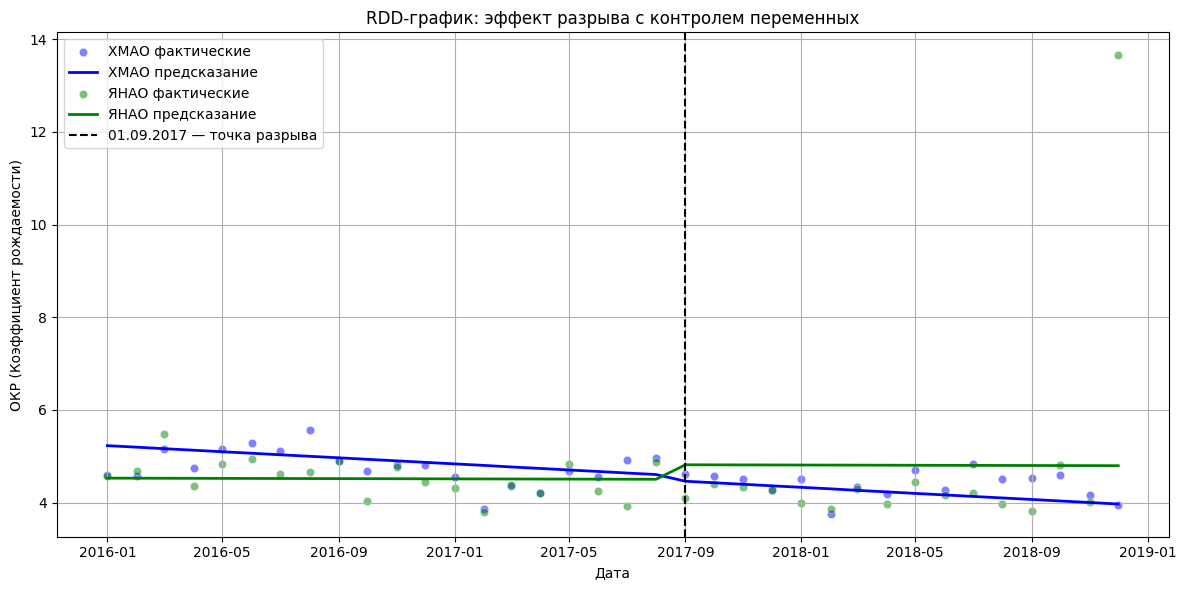

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# === 1. Подготовка данных ===

# Преобразование типов
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True)
df['ОКР'] = pd.to_numeric(df['ОКР'], errors='coerce')
df['Уровень безработицы %'] = pd.to_numeric(df['Уровень безработицы %'], errors='coerce')
df['ЗП ном, руб'] = pd.to_numeric(df['ЗП ном, руб'], errors='coerce')
df['ИЖК, млн руб'] = pd.to_numeric(df['ИЖК, млн руб'], errors='coerce')  # Добавлено

# Дата разрыва
cutoff = pd.to_datetime("2017-09-01")

# Переменные RDD
df['post'] = (df['Дата'] >= cutoff).astype(int)
df['m'] = (df['Дата'].dt.year - cutoff.year) * 12 + (df['Дата'].dt.month - cutoff.month)

# Очистка
df_clean = df.dropna(subset=['ОКР', 'm', 'post', 'Уровень безработицы %', 'ЗП ном, руб', 'ИЖК, млн руб'])

# === 2. Оценка модели RDD с контролями ===

results = {}
for region in ['ХМАО', 'ЯНАО']:
    region_df = df_clean[df_clean['Регион'] == region]

    X = region_df[['post', 'm', 'Уровень безработицы %', 'ЗП ном, руб', 'ИЖК, млн руб']]
    X = sm.add_constant(X)
    y = region_df['ОКР']

    model = sm.OLS(y, X).fit()
    results[region] = model

    print(f"\n=== Модель RDD с контролями для {region} ===")
    print(model.summary())

    # Вывод уравнения модели
    b0 = model.params['const']
    b1 = model.params['post']
    b2 = model.params['m']
    b3 = model.params['Уровень безработицы %']
    b4 = model.params['ЗП ном, руб']
    b5 = model.params['ИЖК, млн руб']

    print(f"\nУравнение для {region}:\n"
          f"ОКР = {b0:.4f} + ({b1:.4f})·post + ({b2:.4f})·m + "
          f"({b3:.4f})·Уровень безработицы + ({b4:.4f})·ЗП ном + ({b5:.4f})·ИЖК\n")

# === 3. Построение графика ===

plt.figure(figsize=(12, 6))
colors = {'ХМАО': 'blue', 'ЯНАО': 'green'}

for region in ['ХМАО', 'ЯНАО']:
    region_df = df_clean[df_clean['Регион'] == region].copy()
    model = results[region]

    # Средние значения контролей
    mean_unemp = region_df['Уровень безработицы %'].mean()
    mean_wage = region_df['ЗП ном, руб'].mean()
    mean_ijc = region_df['ИЖК, млн руб'].mean()

    # Даты прогноза
    dates_full = pd.date_range(start=region_df['Дата'].min(), end=region_df['Дата'].max(), freq='MS')
    m_full = (dates_full.year - cutoff.year) * 12 + (dates_full.month - cutoff.month)
    post_full = (dates_full >= cutoff).astype(int)

    df_pred = pd.DataFrame({
        'const': 1,
        'post': post_full,
        'm': m_full,
        'Уровень безработицы %': mean_unemp,
        'ЗП ном, руб': mean_wage,
        'ИЖК, млн руб': mean_ijc
    })

    df_pred = df_pred[model.model.exog_names]

    # Предсказание
    y_pred = model.predict(df_pred)

    # Фактические точки
    sns.scatterplot(x=region_df['Дата'], y=region_df['ОКР'], color=colors[region], alpha=0.5, label=f'{region} фактические')

    # Линия прогноза
    plt.plot(dates_full, y_pred, color=colors[region], linewidth=2, label=f'{region} предсказание')

# Линия разрыва
plt.axvline(x=cutoff, color='black', linestyle='--', label='01.09.2017 — точка разрыва')

# Подписи и оформление
plt.xlabel('Дата')
plt.ylabel('ОКР (Коэффициент рождаемости)')
plt.title('RDD-график: эффект разрыва с контролем переменных')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


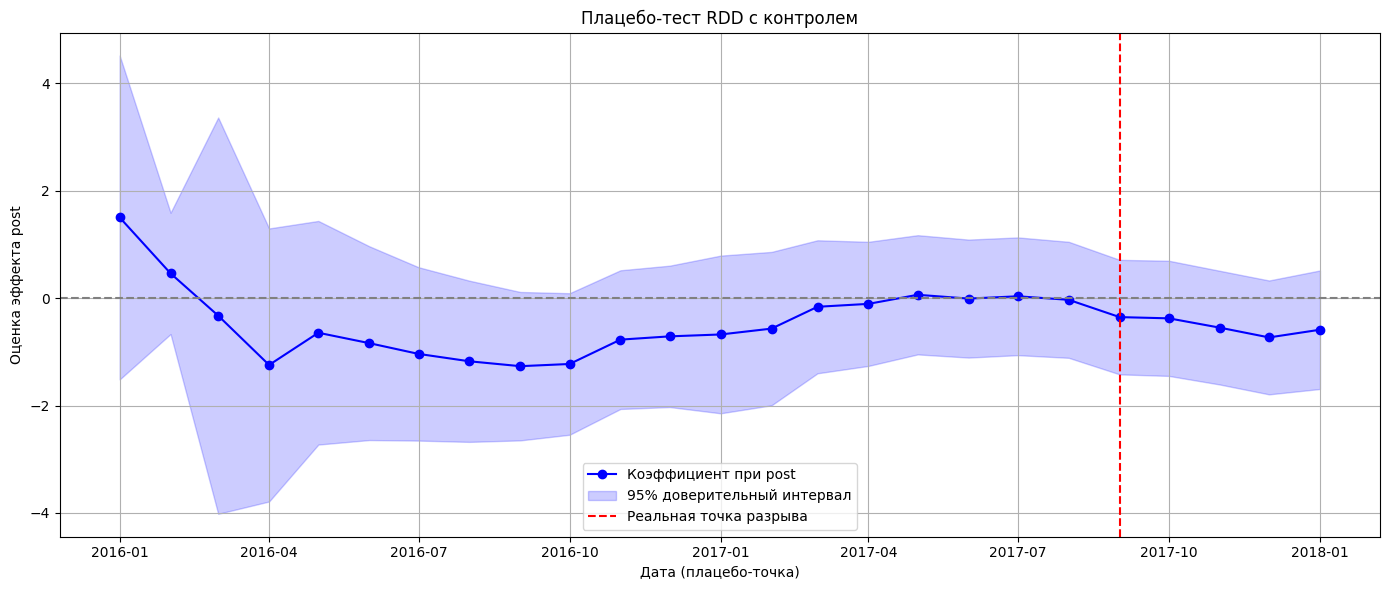

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Копия датафрейма
df = df_clean.copy()

# Диапазон плацебо-точек
placebo_dates = pd.date_range(start='2016-01-01', end='2018-01-01', freq='MS')

effects = []

for placebo_date in placebo_dates:
    df['m'] = (df['Дата'].dt.year - placebo_date.year) * 12 + (df['Дата'].dt.month - placebo_date.month)
    df['post'] = (df['Дата'] >= placebo_date).astype(int)
    df['m_post'] = df['m'] * df['post']

    # Обновлённый набор предикторов, включая ИЖК
    X = df[['m', 'post', 'm_post', 'Уровень безработицы %', 'ЗП ном, руб', 'ИЖК, млн руб']]
    X = sm.add_constant(X)
    y = df['ОКР']

    try:
        model = sm.OLS(y, X).fit()
        coef = model.params['post']
        std_err = model.bse['post']
        ci_low = coef - 1.96 * std_err
        ci_high = coef + 1.96 * std_err

        effects.append({
            'Дата': placebo_date,
            'Коэф_post': coef,
            'CI_low': ci_low,
            'CI_high': ci_high,
            'p-value': model.pvalues['post']
        })
    except:
        continue

results_df = pd.DataFrame(effects)
true_cutoff = pd.to_datetime("2017-09-01")

# Визуализация с доверительными интервалами
plt.figure(figsize=(14, 6))
plt.plot(results_df['Дата'], results_df['Коэф_post'], marker='o', label='Коэффициент при post', color='blue')
plt.fill_between(results_df['Дата'], results_df['CI_low'], results_df['CI_high'], color='blue', alpha=0.2, label='95% доверительный интервал')

plt.axvline(true_cutoff, color='red', linestyle='--', label='Реальная точка разрыва')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Плацебо-тест RDD с контролем')
plt.xlabel('Дата (плацебо-точка)')
plt.ylabel('Оценка эффекта post')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


старое ниже

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Преобразование данных
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True)
df['ОКР'] = pd.to_numeric(df['ОКР'], errors='coerce')
df['Уровень безработицы %'] = pd.to_numeric(df['Уровень безработицы %'], errors='coerce')
df['ЗП ном, руб'] = pd.to_numeric(df['ЗП ном, руб'], errors='coerce')

# Дата разрыва
cutoff = pd.to_datetime("09.01.2017")

# Переменные RDD
df['post'] = (df['Дата'] >= cutoff).astype(int)
df['m'] = ((df['Дата'].dt.to_period('M') - cutoff.to_period('M')).apply(lambda x: x.n))

# Удаляем пропуски
df_clean = df.dropna(subset=['ОКР', 'm', 'post', 'Уровень безработицы %', 'ЗП ном, руб'])

# Регрессионный анализ
results = {}
for region in ['ХМАО', 'ЯНАО']:
    region_df = df_clean[df_clean['Регион'] == region]

    X = region_df[['post', 'm', 'Уровень безработицы %', 'ЗП ном, руб']]
    X = sm.add_constant(X)
    y = region_df['ОКР']

    model = sm.OLS(y, X).fit()
    results[region] = model

    print(f"\n=== Модель RDD с контролями для {region} ===")
    print(model.summary())

    b0 = model.params['const']
    b1 = model.params['post']
    b2 = model.params['m']
    b3 = model.params['Уровень безработицы %']
    b4 = model.params['ЗП ном, руб']

    print(f"\nУравнение для {region}:\nОКР = {b0:.4f} + ({b1:.4f})·post + ({b2:.4f})·m + ({b3:.4f})·Уровень безработицы + ({b4:.4f})·ЗП ном\n")



=== Модель RDD с контролями для ХМАО ===
                            OLS Regression Results                            
Dep. Variable:                    ОКР   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     3.461
Date:                Wed, 18 Jun 2025   Prob (F-statistic):             0.0189
Time:                        13:23:42   Log-Likelihood:                -10.197
No. Observations:                  36   AIC:                             30.39
Df Residuals:                      31   BIC:                             38.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

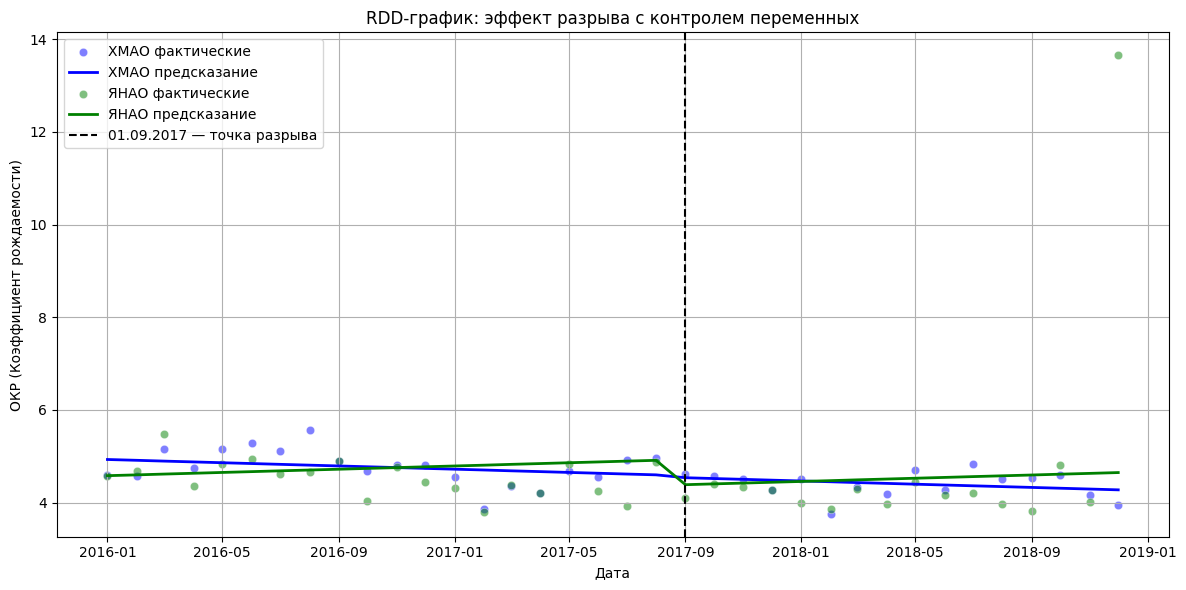

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# === 1. Подготовка данных ===

# Преобразование типов
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True)
df['ОКР'] = pd.to_numeric(df['ОКР'], errors='coerce')
df['Уровень безработицы %'] = pd.to_numeric(df['Уровень безработицы %'], errors='coerce')
df['ЗП ном, руб'] = pd.to_numeric(df['ЗП ном, руб'], errors='coerce')

# Дата разрыва
cutoff = pd.to_datetime("2017-09-01")

# Переменные RDD
df['post'] = (df['Дата'] >= cutoff).astype(int)
df['m'] = (df['Дата'].dt.year - cutoff.year) * 12 + (df['Дата'].dt.month - cutoff.month)

# Очистка
df_clean = df.dropna(subset=['ОКР', 'm', 'post', 'Уровень безработицы %', 'ЗП ном, руб'])

# === 2. Оценка модели RDD с контролями ===

results = {}
for region in ['ХМАО', 'ЯНАО']:
    region_df = df_clean[df_clean['Регион'] == region]

    X = region_df[['post', 'm', 'Уровень безработицы %', 'ЗП ном, руб']]
    X = sm.add_constant(X)
    y = region_df['ОКР']

    model = sm.OLS(y, X).fit()
    results[region] = model

    print(f"\n=== Модель RDD с контролями для {region} ===")
    print(model.summary())

# === 3. Построение графика ===

plt.figure(figsize=(12, 6))
colors = {'ХМАО': 'blue', 'ЯНАО': 'green'}

for region in ['ХМАО', 'ЯНАО']:
    region_df = df_clean[df_clean['Регион'] == region].copy()
    model = results[region]

    # Средние значения контролей
    mean_unemp = region_df['Уровень безработицы %'].mean()
    mean_wage = region_df['ЗП ном, руб'].mean()

    # Даты прогноза
    dates_full = pd.date_range(start=region_df['Дата'].min(), end=region_df['Дата'].max(), freq='MS')
    m_full = (dates_full.year - cutoff.year) * 12 + (dates_full.month - cutoff.month)
    post_full = (dates_full >= cutoff).astype(int)

    df_pred = pd.DataFrame({
        'const': 1,
        'post': post_full,
        'm': m_full,
        'Уровень безработицы %': mean_unemp,
        'ЗП ном, руб': mean_wage
    })

    # Упорядочим столбцы под модель
    df_pred = df_pred[model.model.exog_names]

    # Предсказание
    y_pred = model.predict(df_pred)

    # Фактические точки
    sns.scatterplot(x=region_df['Дата'], y=region_df['ОКР'], color=colors[region], alpha=0.5, label=f'{region} фактические')

    # Линия прогноза
    plt.plot(dates_full, y_pred, color=colors[region], linewidth=2, label=f'{region} предсказание')

# Линия разрыва
plt.axvline(x=cutoff, color='black', linestyle='--', label='01.09.2017 — точка разрыва')

# Подписи и оформление
plt.xlabel('Дата')
plt.ylabel('ОКР (Коэффициент рождаемости)')
plt.title('RDD-график: эффект разрыва с контролем переменных')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

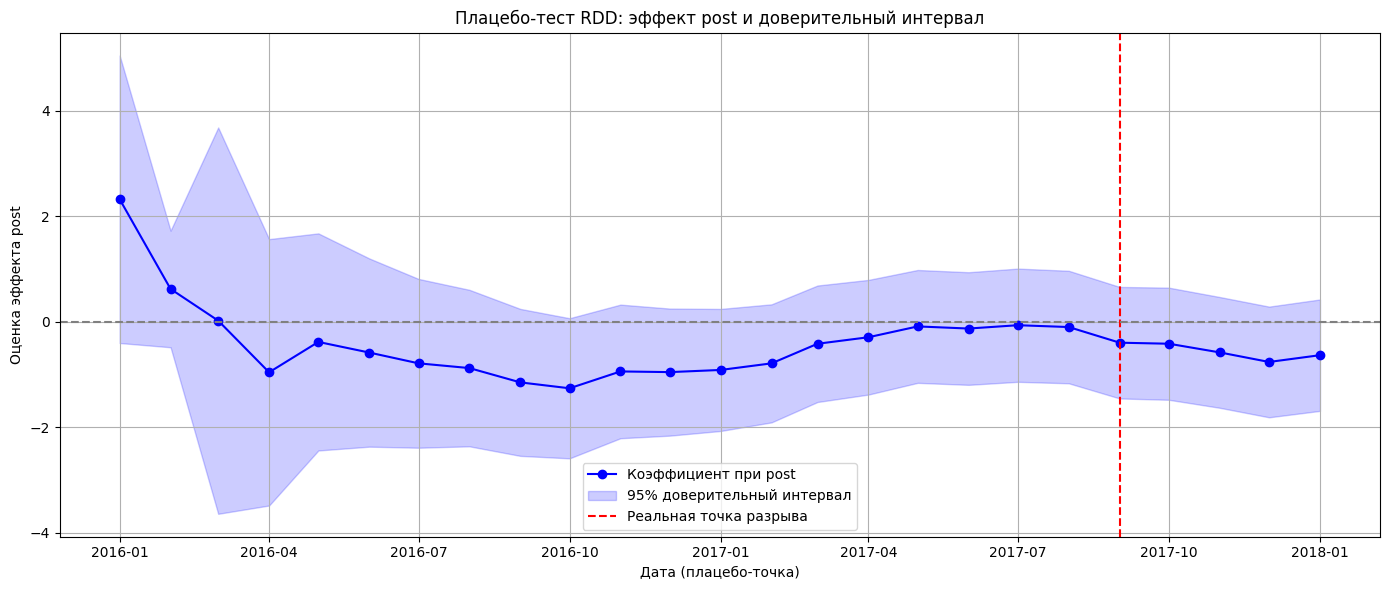

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Копия датафрейма
df = df_clean.copy()

# Диапазон плацебо-точек
placebo_dates = pd.date_range(start='2016-01-01', end='2018-01-01', freq='MS')

effects = []

for placebo_date in placebo_dates:
    df['m'] = (df['Дата'].dt.year - placebo_date.year) * 12 + (df['Дата'].dt.month - placebo_date.month)
    df['post'] = (df['Дата'] >= placebo_date).astype(int)
    df['m_post'] = df['m'] * df['post']

    X = df[['m', 'post', 'm_post', 'Уровень безработицы %', 'ЗП ном, руб']]
    X = sm.add_constant(X)
    y = df['ОКР']

    try:
        model = sm.OLS(y, X).fit()
        coef = model.params['post']
        std_err = model.bse['post']
        ci_low = coef - 1.96 * std_err
        ci_high = coef + 1.96 * std_err

        effects.append({
            'Дата': placebo_date,
            'Коэф_post': coef,
            'CI_low': ci_low,
            'CI_high': ci_high,
            'p-value': model.pvalues['post']
        })
    except:
        continue

results_df = pd.DataFrame(effects)
true_cutoff = pd.to_datetime("2017-09-01")

# Визуализация с доверительными интервалами
plt.figure(figsize=(14, 6))
plt.plot(results_df['Дата'], results_df['Коэф_post'], marker='o', label='Коэффициент при post', color='blue')
plt.fill_between(results_df['Дата'], results_df['CI_low'], results_df['CI_high'], color='blue', alpha=0.2, label='95% доверительный интервал')

plt.axvline(true_cutoff, color='red', linestyle='--', label='Реальная точка разрыва')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Плацебо-тест RDD: эффект post и доверительный интервал')
plt.xlabel('Дата (плацебо-точка)')
plt.ylabel('Оценка эффекта post')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Серая линия - отсутствие эффекта

Синяя область - 95% ДИ, то есть высокая вероятность, где истинное значение эффекта пост

В начале 16 года есть колебания, там возможно нет статистической значимости, где выше 0 значения. Возможно, были другие эффекты. Нет эффекта в других точках, эффекта после нет. Разрыв не оказал сильного влияния.